In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install statsmodels

import statsmodels as st

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


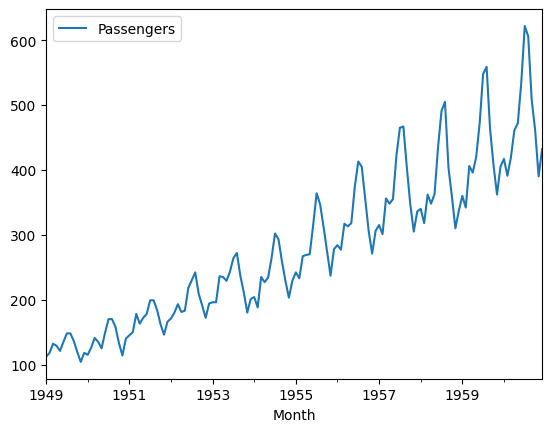

In [8]:
df.plot();

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
alpha = 0.2

In [11]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust = False).mean()

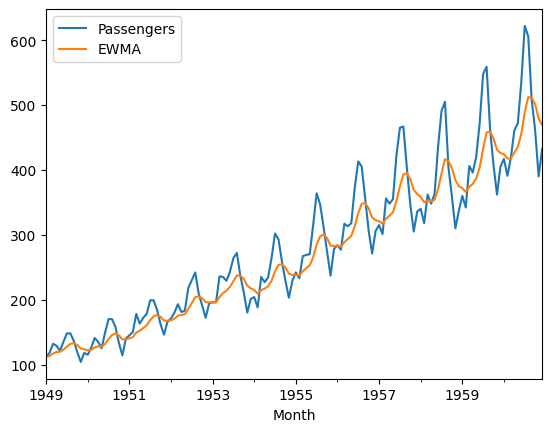

In [12]:
df.plot();

In [13]:
manual_ewma = []

for x in df['Passengers'].to_numpy():
  if len(manual_ewma)>0:
    xhat =  alpha * x + (1-alpha)*manual_ewma[-1]
  else:
    xhat = x

  manual_ewma.append(xhat)

df['Manual_EWMA'] = manual_ewma


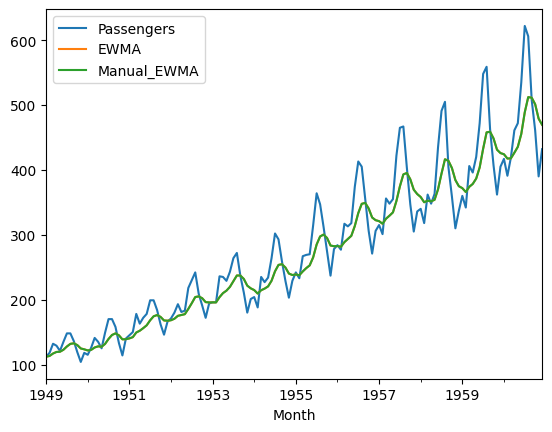

In [14]:
df.plot();